# XG Boost Modelling


In [3]:
import pandas as pd
import numpy as np

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score

xg_df = pd.read_csv("Set B Corporate Rating - marketvalue3classes.csv") # to read the data from the csv
xg_df # to call

,Total Asset,Cash,Total Debt in Current Liabilities,Total Long-Term Debt,Earnings Before Interest,Gross Profit (Loss),Total Liabilities,Retained Earnings,Total debt/total asset,Total asset/Total libiilities,...,Total Revenue,Operating Activities - Net Cash Flow,Financing Activities - Net Cash Flow,Net Cash Flow,Rating level,Debt-to-Equity Ratio,Total Current Asset,Working Capital Ratio,Debt Service Coverage Ratio,Gross Profit Margin
0,43771.000,994.000,1708.00,16196.000,6585.000,13139.000,41750.000,-13121.000,0.370017,1.048407,...,42650.000,3080.000,-315.000,2765.000,High Risk,-6.323602,1998.000,0.137907,0.367795,30.806565
1,14313.532,7.604,530.97,3031.215,1228.600,1228.600,9794.430,1857.924,0.211773,1.461395,...,3491.632,1099.627,-178.881,920.746,Low Risk,-0.435767,263.590,0.105426,0.344901,35.186984
2,41275.000,4063.000,4437.00,3408.000,4475.000,12088.000,19636.000,17821.000,0.082568,2.102007,...,20247.000,3675.000,-2742.000,933.000,Low Risk,0.252599,6706.000,-6.517007,0.570427,59.702672
3,53402.100,1420.400,729.30,7852.000,4848.700,15091.500,38850.300,9940.400,0.147035,1.374561,...,58003.200,3372.800,-1235.000,2137.800,Low Risk,-0.439355,1420.400,0.199419,0.565031,26.018392
4,17779.100,336.600,1294.00,4824.500,2560.600,3761.300,9970.500,8751.300,0.271358,1.783170,...,10439.000,2187.100,-661.400,1525.700,Low Risk,-0.297352,1198.000,0.339329,0.418501,36.031229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,441.952,83.355,0.00,221.082,33.838,181.642,514.066,-111.801,0.500240,0.859718,...,687.969,7.631,1.732,9.363,High Risk,3.065729,140.403,0.635072,0.153056,26.402643
2582,6152.800,3961.400,0.00,997.600,704.000,2147.700,4152.700,1452.800,0.162138,1.481638,...,14237.100,748.300,833.100,1581.400,Moderate Risk,-0.498775,3961.400,3.970930,0.705694,15.085235
2583,1364.696,73.534,0.00,502.539,297.495,451.277,907.761,145.521,0.368242,1.503365,...,1265.364,270.275,-78.942,191.333,Moderate Risk,-1.099804,86.061,0.171252,0.591984,35.663809
2584,45547.000,5017.000,10279.00,14997.000,2003.000,5125.000,41075.000,20.000,0.329264,1.108874,...,23669.000,2108.000,-1538.000,570.000,Moderate Risk,1.249382,10626.000,2.252226,0.079245,21.652795


In [4]:
# Step 2: Column Filter Node - remove unnecessary columns (axis=1 removes columns)
xg_df= xg_df.drop(
    # Include columns to remove here
    ['Total Revenue'],  # Specify 'Total Revenue' for exclusion
    axis=1, 
    errors='ignore'  # Prevent errors if the column is not present
)

xg_df  # Display the filtered dataframe

,Total Asset,Cash,Total Debt in Current Liabilities,Total Long-Term Debt,Earnings Before Interest,Gross Profit (Loss),Total Liabilities,Retained Earnings,Total debt/total asset,Total asset/Total libiilities,...,Total Inventories,Operating Activities - Net Cash Flow,Financing Activities - Net Cash Flow,Net Cash Flow,Rating level,Debt-to-Equity Ratio,Total Current Asset,Working Capital Ratio,Debt Service Coverage Ratio,Gross Profit Margin
0,43771.000,994.000,1708.00,16196.000,6585.000,13139.000,41750.000,-13121.000,0.370017,1.048407,...,1004.000,3080.000,-315.000,2765.000,High Risk,-6.323602,1998.000,0.137907,0.367795,30.806565
1,14313.532,7.604,530.97,3031.215,1228.600,1228.600,9794.430,1857.924,0.211773,1.461395,...,255.986,1099.627,-178.881,920.746,Low Risk,-0.435767,263.590,0.105426,0.344901,35.186984
2,41275.000,4063.000,4437.00,3408.000,4475.000,12088.000,19636.000,17821.000,0.082568,2.102007,...,2643.000,3675.000,-2742.000,933.000,Low Risk,0.252599,6706.000,-6.517007,0.570427,59.702672
3,53402.100,1420.400,729.30,7852.000,4848.700,15091.500,38850.300,9940.400,0.147035,1.374561,...,0.000,3372.800,-1235.000,2137.800,Low Risk,-0.439355,1420.400,0.199419,0.565031,26.018392
4,17779.100,336.600,1294.00,4824.500,2560.600,3761.300,9970.500,8751.300,0.271358,1.783170,...,861.400,2187.100,-661.400,1525.700,Low Risk,-0.297352,1198.000,0.339329,0.418501,36.031229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,441.952,83.355,0.00,221.082,33.838,181.642,514.066,-111.801,0.500240,0.859718,...,57.048,7.631,1.732,9.363,High Risk,3.065729,140.403,0.635072,0.153056,26.402643
2582,6152.800,3961.400,0.00,997.600,704.000,2147.700,4152.700,1452.800,0.162138,1.481638,...,0.000,748.300,833.100,1581.400,Moderate Risk,-0.498775,3961.400,3.970930,0.705694,15.085235
2583,1364.696,73.534,0.00,502.539,297.495,451.277,907.761,145.521,0.368242,1.503365,...,12.527,270.275,-78.942,191.333,Moderate Risk,-1.099804,86.061,0.171252,0.591984,35.663809
2584,45547.000,5017.000,10279.00,14997.000,2003.000,5125.000,41075.000,20.000,0.329264,1.108874,...,5609.000,2108.000,-1538.000,570.000,Moderate Risk,1.249382,10626.000,2.252226,0.079245,21.652795


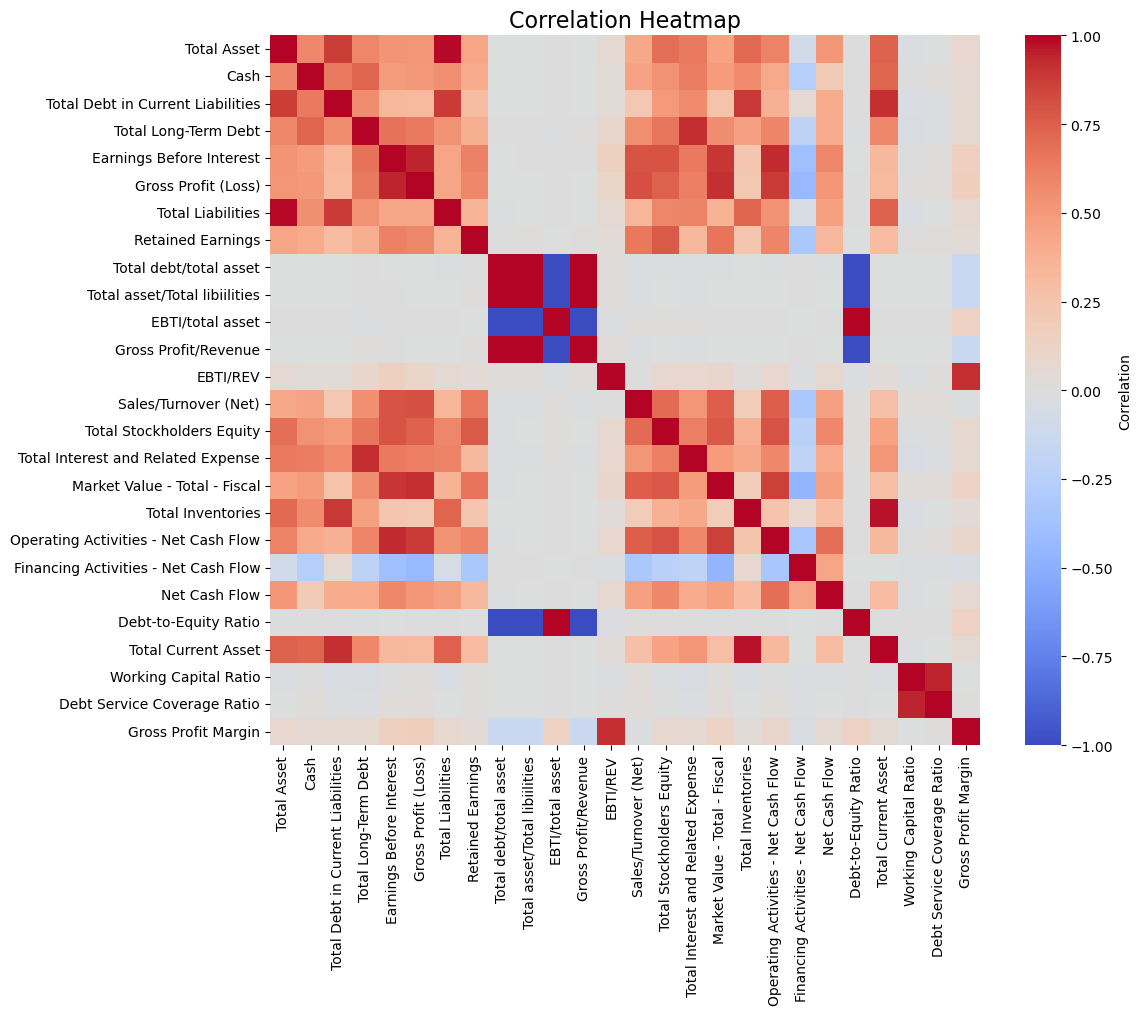

In [5]:
#linear correlation
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = xg_df.select_dtypes(include=[np.number])  # Select only numeric columns

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(
    correlation_matrix,
    annot=False,  # Do not display correlation values in the cells
    cmap='coolwarm',  
    vmin=-1, vmax=1,  # Set correlation range
    cbar_kws={'label': 'Correlation'},  # Add a color bar
    square=True  # Make cells square
)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust spacing

# Show the heatmap
plt.show()

In [6]:
# Define the feature matrix by dropping the target column
X_filtered = xg_df.drop(columns=['Rating level'])

# Define the target variable
y = xg_df['Rating level']

In [7]:
# parameter optimization loop
# Define the range for sigma
sigma_values = np.arange(0.3, 0.6 + 0.1, 0.1)  # Start, Stop (inclusive), Step
print("Sigma values to evaluate:", sigma_values)

Sigma values to evaluate: [0.3 0.4 0.5 0.6]


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np

# Define your feature matrix and target variable
# Ensure X_filtered and y are correctly defined before this section
X_filtered = xg_df.drop(columns=['Rating level'])  # Replace 'Rating level' with your target column name
y = xg_df['Rating level']  # Replace 'Rating level' with your target column name

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize StratifiedKFold
num_folds = 5  # Adjust based on your dataset size
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define range for sigma values
sigma_values = np.arange(0.3, 0.6 + 0.1, 0.1)  # Adjust as needed

# Store the results
results = []

for sigma in sigma_values:
    print(f"Training with sigma = {sigma}")
    
    # Define the model with sigma as the hyperparameter
    model = XGBClassifier(subsample=sigma, random_state=42)
    
    # Perform cross-validation
    fold_accuracies = []
    for train_index, test_index in skf.split(X_filtered, y_encoded):
        X_train, X_test = X_filtered.iloc[train_index], X_filtered.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)
    
    # Store the average accuracy for this sigma
    avg_accuracy = np.mean(fold_accuracies)
    results.append((sigma, avg_accuracy))
    print(f"Sigma = {sigma}, Average Accuracy = {avg_accuracy:.4f}")

# Display the best sigma value
best_sigma, best_accuracy = max(results, key=lambda x: x[1])
print(f"\nBest Sigma: {best_sigma}, Best Average Accuracy: {best_accuracy:.4f}")

Training with sigma = 0.3
Sigma = 0.3, Average Accuracy = 0.8565
Training with sigma = 0.4
Sigma = 0.4, Average Accuracy = 0.8662
Training with sigma = 0.5
Sigma = 0.5, Average Accuracy = 0.8639
Training with sigma = 0.6000000000000001
Sigma = 0.6000000000000001, Average Accuracy = 0.8724

Best Sigma: 0.6000000000000001, Best Average Accuracy: 0.8724


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1: Training Accuracy = 0.9440, Test Accuracy = 0.7391


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2: Training Accuracy = 0.9428, Test Accuracy = 0.8696


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3: Training Accuracy = 0.9452, Test Accuracy = 0.8235


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4: Training Accuracy = 0.9452, Test Accuracy = 0.8824


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5: Training Accuracy = 0.9420, Test Accuracy = 0.8529


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 6: Training Accuracy = 0.9416, Test Accuracy = 0.8676


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 7: Training Accuracy = 0.9428, Test Accuracy = 0.8529


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 8: Training Accuracy = 0.9444, Test Accuracy = 0.8824


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 9: Training Accuracy = 0.9412, Test Accuracy = 0.7941


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 10: Training Accuracy = 0.9436, Test Accuracy = 0.8382


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 11: Training Accuracy = 0.9420, Test Accuracy = 0.8676


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 12: Training Accuracy = 0.9412, Test Accuracy = 0.8235


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 13: Training Accuracy = 0.9416, Test Accuracy = 0.8088


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 14: Training Accuracy = 0.9452, Test Accuracy = 0.8382


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 15: Training Accuracy = 0.9464, Test Accuracy = 0.8382


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 16: Training Accuracy = 0.9440, Test Accuracy = 0.8235


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 17: Training Accuracy = 0.9444, Test Accuracy = 0.8971


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 18: Training Accuracy = 0.9440, Test Accuracy = 0.7353


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 19: Training Accuracy = 0.9412, Test Accuracy = 0.8088


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 20: Training Accuracy = 0.9436, Test Accuracy = 0.8824


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 21: Training Accuracy = 0.9452, Test Accuracy = 0.8088


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 22: Training Accuracy = 0.9476, Test Accuracy = 0.9265


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 23: Training Accuracy = 0.9472, Test Accuracy = 0.8824


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 24: Training Accuracy = 0.9468, Test Accuracy = 0.8971


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 25: Training Accuracy = 0.9392, Test Accuracy = 0.9118


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 26: Training Accuracy = 0.9420, Test Accuracy = 0.7647


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 27: Training Accuracy = 0.9416, Test Accuracy = 0.8676


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 28: Training Accuracy = 0.9412, Test Accuracy = 0.8235


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 29: Training Accuracy = 0.9460, Test Accuracy = 0.7353


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 30: Training Accuracy = 0.9440, Test Accuracy = 0.8824


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 31: Training Accuracy = 0.9464, Test Accuracy = 0.7647


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 32: Training Accuracy = 0.9404, Test Accuracy = 0.8529


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 33: Training Accuracy = 0.9444, Test Accuracy = 0.8676


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 34: Training Accuracy = 0.9448, Test Accuracy = 0.8824


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 35: Training Accuracy = 0.9436, Test Accuracy = 0.8676


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 36: Training Accuracy = 0.9420, Test Accuracy = 0.8676


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 37: Training Accuracy = 0.9436, Test Accuracy = 0.8676


c:\Users\22043841\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:02:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 38: Training Accuracy = 0.9452, Test Accuracy = 0.8824

Average Training Accuracy: 0.9436
Average Test Accuracy: 0.8442

Aggregated Confusion Matrix:
[[ 272  132    4]
 [  54 1491   83]
 [   0  130  420]]


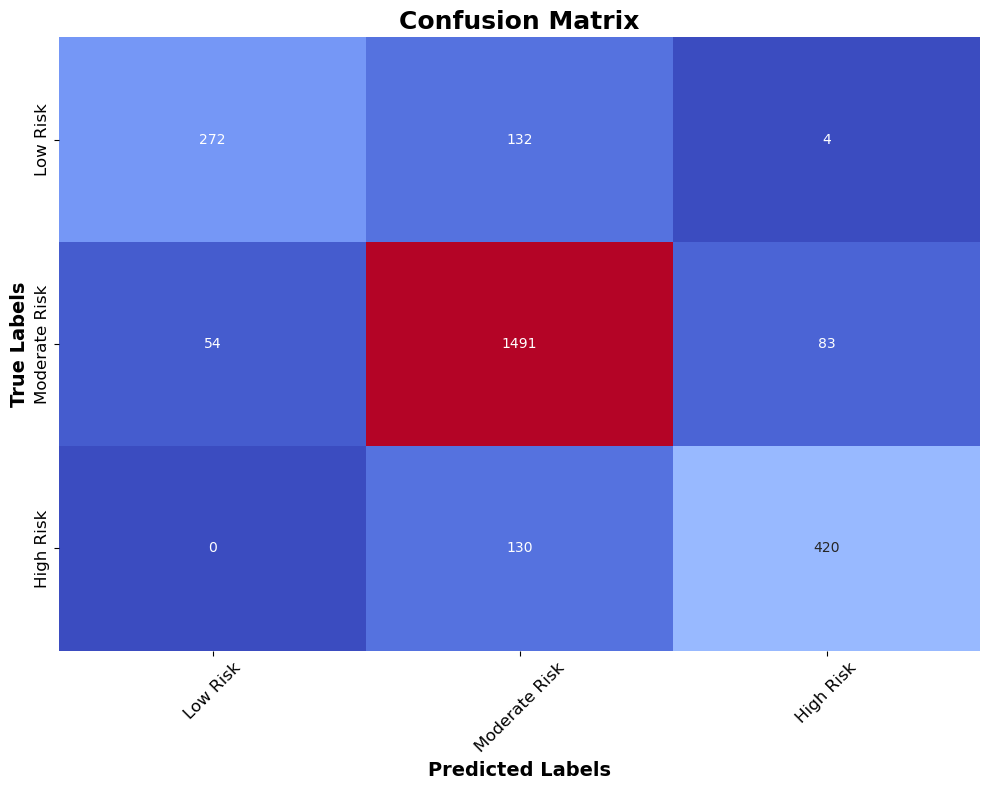


Aggregated Classification Report:
               precision    recall  f1-score      support
Low Risk        0.834356  0.666667  0.741144   408.000000
Moderate Risk   0.850542  0.915848  0.881988  1628.000000
High Risk       0.828402  0.763636  0.794702   550.000000
accuracy        0.844161  0.844161  0.844161     0.844161
macro avg       0.837767  0.782050  0.805945  2586.000000
weighted avg    0.843279  0.844161  0.841202  2586.000000


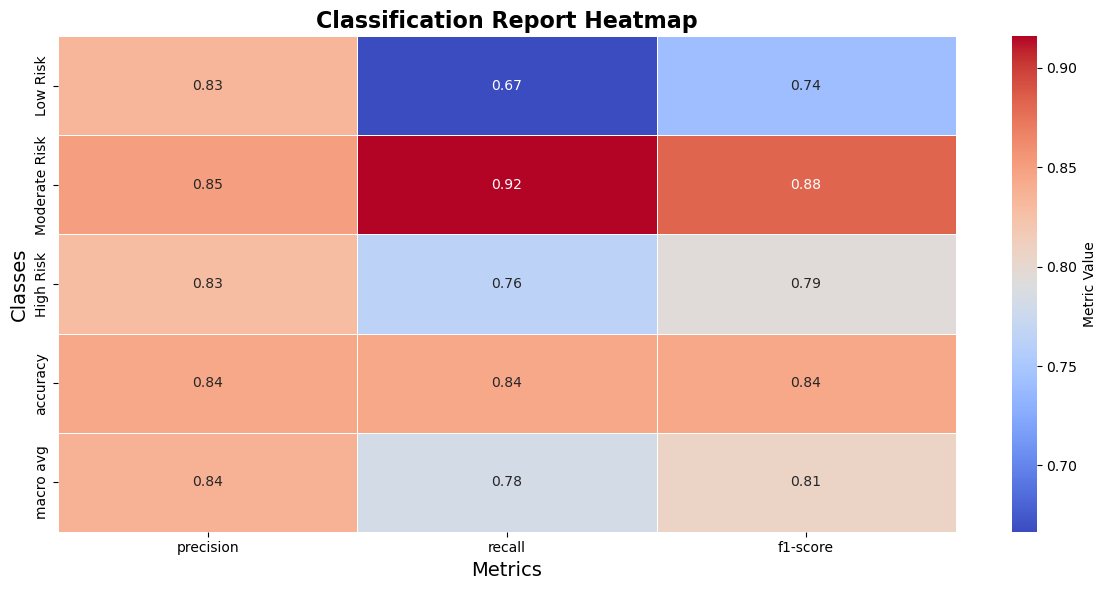


Aggregated Overall Accuracy: 84.42%


In [19]:
# x-partitioner and xgboost tree learner
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from joblib import dump
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For heatmap visualization


# Define the correct order of labels
correct_label_order = ["Low Risk", "Moderate Risk", "High Risk"]  # Explicitly set the desired label order

# Step 1: Encode the target labels with the correct order
# initialize the labelencoder and encode target labels
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(correct_label_order)  #Manually set the order of classes

# Check for consistency between label encoder classes and target variable
if len(label_encoder.classes_) != len(set(y)):
    raise ValueError("Mismatch between label encoder classes and the target variable.")

y_encoded = label_encoder.transform(y)  # Transform the target labels based on the custom order

# Save the fitted LabelEncoder for reuse in testing.py
dump(label_encoder, 'label_encoder.joblib')  # Save the LabelEncoder to a file

# Number of validation folds
num_folds = 38  # Adjust based on your dataset size
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Store results for both training and testing accuracies
train_accuracies = []
test_accuracies = []

# Initialize lists for X-Aggregator
all_y_test = []
all_y_test_pred = []

# Cross-validation loop
for fold, (train_index, test_index) in enumerate(skf.split(X_filtered, y_encoded), start=1):
     # Split the dataset into training and testing sets for the current fold
    X_train, X_test = X_filtered.iloc[train_index], X_filtered.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Define the XGBoost model with specified parameters
    model = XGBClassifier(  #Moved model initialization inside the loop for a fresh instance per fold
        max_depth=3,             # Maximum depth of trees
        learning_rate=0.3,       # Eta (learning rate)
        min_child_weight=1,      # Minimum child weight
        gamma=0,                 # Minimum loss reduction (Gamma)
        reg_lambda=5,            # L2 regularization term (Lambda)
        reg_alpha=5,             # L1 regularization term (Alpha)
        scale_pos_weight=1,      # Scale positive weight
        max_delta_step=0,        # Maximum delta step
        subsample=1,             # Subsampling rate
        colsample_bytree=1,      # Column sampling rate by tree
        objective='multi:softmax', # Multi-class classification objective
        booster='gbtree',        # Booster type
        tree_method='auto',      # Tree construction method
        grow_policy='depthwise', # Growth policy
        n_estimators=100,        # Number of trees
        random_state=42          # For reproducibility
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model on the training set
    # Predict on training data (First XGBoost Predictor)
    y_train_pred = model.predict(X_train) # Predictions for training data
    train_accuracy = accuracy_score(y_train, y_train_pred) # Training accuracy
    train_accuracies.append(train_accuracy) # Store training accuracy
    
    # Evaluate the model on the test set
    # Predict on test data (Second XGBoost Predictor)
    y_test_pred = model.predict(X_test) # Predictions for testing data
    test_accuracy = accuracy_score(y_test, y_test_pred) # Testing accuracy
    test_accuracies.append(test_accuracy) # Store testing accuracy
    
    # Store predictions for X-Aggregator
    all_y_test.extend(y_test)
    all_y_test_pred.extend(y_test_pred)
    
    # Print fold-wise results
    print(f"Fold {fold}: Training Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

# Calculate and print average accuracies
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
print(f"\nAverage Training Accuracy: {average_train_accuracy:.4f}")
print(f"Average Test Accuracy: {average_test_accuracy:.4f}")

# Generate and visualize the confusion matrix for all test predictions
# Confusion Matrix Visualization
print("\nAggregated Confusion Matrix:")
conf_matrix = confusion_matrix(all_y_test, all_y_test_pred)
print(conf_matrix)

# Plotting the Confusion Matrix (Heatmap) - ADDED
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cmap='coolwarm',  # Updated colormap
    xticklabels=label_encoder.classes_, 
    yticklabels=label_encoder.classes_,
    cbar=False  # Removes the color bar for simplicity
)

# Titles and labels for the heatmap
plt.title("Confusion Matrix", fontsize=18, fontweight='bold')  # ADDED
plt.xlabel("Predicted Labels", fontsize=14, fontweight='bold')  # ADDED
plt.ylabel("True Labels", fontsize=14, fontweight='bold')  # ADDED
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Classification Report - ADDED
print("\nAggregated Classification Report:")
report = classification_report(all_y_test, all_y_test_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

# Classification Report Heatmap 
plt.figure(figsize=(12, 6))
sns.heatmap(
    report_df.iloc[:-1, :-1],  # Exclude support column for clarity
    annot=True,
    fmt='.2f',
    cmap='coolwarm',  # A different colormap for differentiation
    linewidths=0.5,
    cbar=True,
    cbar_kws={'label': 'Metric Value'}
)
plt.title("Classification Report Heatmap", fontsize=16, fontweight='bold')
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Classes", fontsize=14)
plt.tight_layout()
plt.show()

# Overall Accuracy
overall_accuracy = accuracy_score(all_y_test, all_y_test_pred)
print(f"\nAggregated Overall Accuracy: {overall_accuracy:.2%}")



Overall Classification Report:
               precision    recall  f1-score   support

     Low Risk       0.83      0.67      0.74       408
Moderate Risk       0.85      0.92      0.88      1628
    High Risk       0.83      0.76      0.79       550

     accuracy                           0.84      2586
    macro avg       0.84      0.78      0.81      2586
 weighted avg       0.84      0.84      0.84      2586


Confusion Matrix:
[[ 272  132    4]
 [  54 1491   83]
 [   0  130  420]]


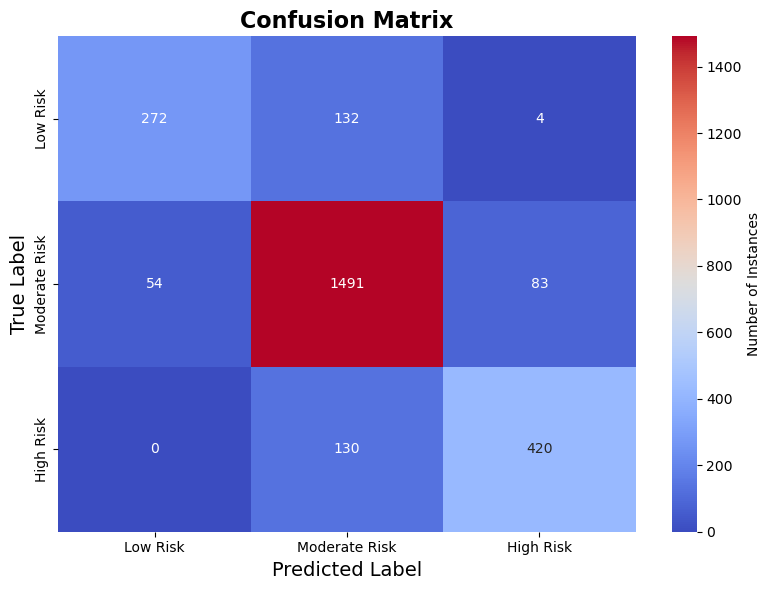

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate results (X-Aggregator functionality)
print("\nOverall Classification Report:")
print(classification_report(all_y_test, all_y_test_pred, target_names=label_encoder.classes_))

# Optional: Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(all_y_test, all_y_test_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True,         
            fmt='d',            
            cmap='coolwarm',     # Use a visually distinct color map
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Number of Instances'})  

# Titles and labels
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.tight_layout()
plt.show()


Aggregated Confusion Matrix:
[[ 272  132    4]
 [  54 1491   83]
 [   0  130  420]]

Aggregated Confusion Matrix (Percentages):
[[66.67 32.35  0.98]
 [ 3.32 91.58  5.1 ]
 [ 0.   23.64 76.36]]

Aggregated Classification Report:
               precision    recall  f1-score   support

     Low Risk       0.83      0.67      0.74       408
Moderate Risk       0.85      0.92      0.88      1628
    High Risk       0.83      0.76      0.79       550

     accuracy                           0.84      2586
    macro avg       0.84      0.78      0.81      2586
 weighted avg       0.84      0.84      0.84      2586


Aggregated Overall Accuracy: 84.42%


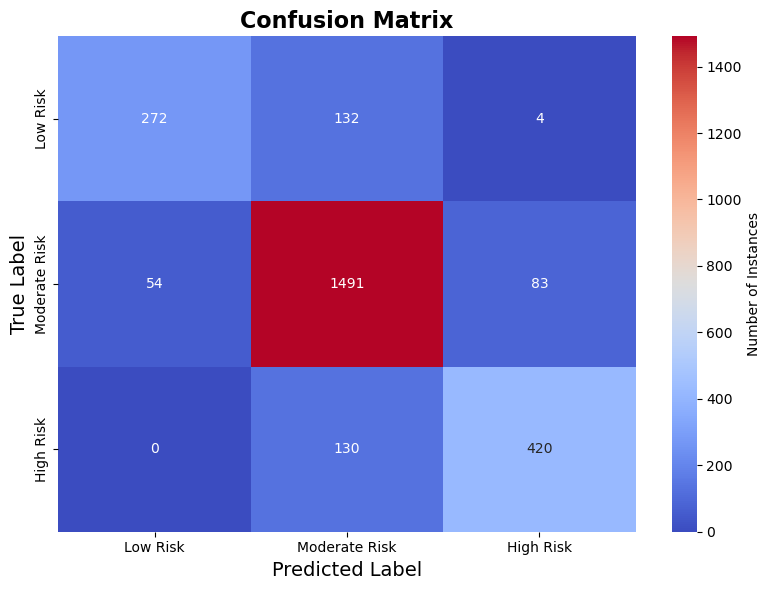


Aggregated Classification Report:
               precision    recall  f1-score   support

     Low Risk       0.83      0.67      0.74       408
Moderate Risk       0.85      0.92      0.88      1628
    High Risk       0.83      0.76      0.79       550

     accuracy                           0.84      2586
    macro avg       0.84      0.78      0.81      2586
 weighted avg       0.84      0.84      0.84      2586


Aggregated Overall Accuracy: 84.42%


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
print("\nAggregated Confusion Matrix:")
conf_matrix = confusion_matrix(all_y_test, all_y_test_pred)
print(conf_matrix)

# Display confusion matrix as percentages
conf_matrix_percentages = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
print("\nAggregated Confusion Matrix (Percentages):")
print(np.round(conf_matrix_percentages, 2))

# Classification Report
print("\nAggregated Classification Report:")
print(classification_report(all_y_test, all_y_test_pred, target_names=label_encoder.classes_))

# Overall Accuracy
overall_accuracy = accuracy_score(all_y_test, all_y_test_pred)
print(f"\nAggregated Overall Accuracy: {overall_accuracy:.2%}")

# Confusion Matrix Visualization - ADDED
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True,         
            fmt='d',            
            cmap='coolwarm',     # Use a visually distinct color map
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Number of Instances'})  

# Titles and labels
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.tight_layout()
plt.show()

# Classification Report
print("\nAggregated Classification Report:")
print(classification_report(all_y_test, all_y_test_pred, target_names=label_encoder.classes_))

# Overall Accuracy
overall_accuracy = accuracy_score(all_y_test, all_y_test_pred)
print(f"\nAggregated Overall Accuracy: {overall_accuracy:.2%}")

In [23]:
# Confusion Matrix for Test Data
print("\nAggregated Confusion Matrix (Testing):")
test_conf_matrix = confusion_matrix(all_y_test, all_y_test_pred)
print(test_conf_matrix)

# Display confusion matrix as percentages
test_conf_matrix_percentages = test_conf_matrix.astype('float') / test_conf_matrix.sum(axis=1)[:, np.newaxis] * 100
print("\nAggregated Confusion Matrix (Percentages):")
print(np.round(test_conf_matrix_percentages, 2))


# Classification Report for Test Data
print("\nAggregated Classification Report (Testing):")
print(classification_report(all_y_test, all_y_test_pred, target_names=label_encoder.classes_))

# Overall Testing Accuracy
test_accuracy = accuracy_score(all_y_test, all_y_test_pred)
print(f"\nAggregated Overall Testing Accuracy: {test_accuracy:.2%}")

# Cohen's Kappa
kappa = cohen_kappa_score(all_y_test, all_y_test_pred)
print(f"Cohen's Kappa: {kappa:.3f}")

# Correctly and Incorrectly Classified Counts
correctly_classified = sum(np.array(all_y_test) == np.array(all_y_test_pred))
incorrectly_classified = len(all_y_test) - correctly_classified
print(f"Correctly Classified: {correctly_classified}")
print(f"Incorrectly Classified: {incorrectly_classified}")



Aggregated Confusion Matrix (Testing):
[[ 272  132    4]
 [  54 1491   83]
 [   0  130  420]]

Aggregated Confusion Matrix (Percentages):
[[66.67 32.35  0.98]
 [ 3.32 91.58  5.1 ]
 [ 0.   23.64 76.36]]

Aggregated Classification Report (Testing):
               precision    recall  f1-score   support

     Low Risk       0.83      0.67      0.74       408
Moderate Risk       0.85      0.92      0.88      1628
    High Risk       0.83      0.76      0.79       550

     accuracy                           0.84      2586
    macro avg       0.84      0.78      0.81      2586
 weighted avg       0.84      0.84      0.84      2586


Aggregated Overall Testing Accuracy: 84.42%
Cohen's Kappa: 0.695
Correctly Classified: 2183
Incorrectly Classified: 403


In [13]:
# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

param_grid = {
    'max_depth': [3],          # Depth of the trees
    'learning_rate': [0.1],     # Learning rate (eta)
    'n_estimators': [50],       # Number of trees
    'subsample': [0.8],         # Subsample ratio (fraction of samples used for training each tree)
    'colsample_bytree': [0.8]   # Fraction of features used for building each tree
}

# Loop through parameter combinations
for max_depth in param_grid['max_depth']:
    for learning_rate in param_grid['learning_rate']:
        for n_estimators in param_grid['n_estimators']:
            for subsample in param_grid['subsample']:
                for colsample_bytree in param_grid['colsample_bytree']:
                    test_accuracies = []
                    
                    # Cross-validation loop
                    for train_index, test_index in skf.split(X_filtered, y_encoded):
                        X_train, X_test = X_filtered.iloc[train_index], X_filtered.iloc[test_index]
                        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
                        
                        # Define the model
                        model = XGBClassifier(
                            max_depth=max_depth,
                            learning_rate=learning_rate,
                            n_estimators=n_estimators,
                            subsample=subsample,
                            colsample_bytree=colsample_bytree,
                            random_state=42
                        )
                        model.fit(X_train, y_train)
                        
                        # Test accuracy
                        y_test_pred = model.predict(X_test)
                        test_accuracies.append(accuracy_score(y_test, y_test_pred))
                    
                    # Average test accuracy for this parameter combination
                    avg_test_accuracy = np.mean(test_accuracies)
                    
                    # Store the result
                    results.append({
                        'max_depth': max_depth,
                        'learning_rate': learning_rate,
                        'n_estimators': n_estimators,
                        'subsample': subsample,
                        'colsample_bytree': colsample_bytree,
                        'test_accuracy': avg_test_accuracy
                    })

# Find the best parameter combination based on test accuracy
best_result = max(results, key=lambda x: x['test_accuracy'])

print("\nBest Parameters:")
print(best_result)


Best Parameters:
{'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 50, 'subsample': 0.8, 'colsample_bytree': 0.8, 'test_accuracy': 0.8209554677639783}


In [14]:
from joblib import dump

# Save the model to a file
dump(model, 'credit_risk_model.joblib')


['credit_risk_model.joblib']